# Random Forest in sklearn

@masahiro rikiso, 170306

* http://scikit-learn.org/stable/modules/ensemble.html

---

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

## load dataset

In [11]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=3000, n_features=10, centers=50, cluster_std=1.)
X.shape, y.shape

((3000, 10), (3000,))

## CV about 1) n_estimators, 2) max_depth, 3) max_features[option]

tips for random_forest

* max_features='auto' is good! In this case, max_features=sqrt(n_features). 
* If you want to change max_feature, it is also good.(use cross-validation) 
* strong tree is good for random forest, while week tree is good for boosting.

In [15]:
score_mean = []
for num in range(10,50,5):
    for depth in range(5,10): 
        clf = RandomForestClassifier(n_estimators=num, criterion='entropy', max_depth=depth)
        score = cross_val_score(clf, X, y, cv=10)
        print (num, depth, score.mean(), score.std())
        score_mean.append(score.mean())        

10 5 0.994 0.00388730126323
10 6 0.999666666667 0.001
10 7 0.999666666667 0.001
10 8 1.0 0.0
10 9 0.999666666667 0.001
15 5 0.998 0.00221108319357
15 6 0.999333333333 0.00133333333333
15 7 0.999666666667 0.001
15 8 1.0 0.0
15 9 0.999666666667 0.001
20 5 0.997666666667 0.00213437474581
20 6 0.999333333333 0.00133333333333
20 7 0.999666666667 0.001
20 8 0.999666666667 0.001
20 9 1.0 0.0
25 5 0.998 0.0030550504633
25 6 1.0 0.0
25 7 0.999666666667 0.001
25 8 0.999666666667 0.001
25 9 1.0 0.0
30 5 0.998333333333 0.0022360679775
30 6 0.999666666667 0.001
30 7 1.0 0.0
30 8 1.0 0.0
30 9 1.0 0.0
35 5 0.998 0.00266666666667
35 6 0.999666666667 0.001
35 7 0.999666666667 0.001
35 8 0.999666666667 0.001
35 9 1.0 0.0
40 5 0.999333333333 0.00133333333333
40 6 0.999666666667 0.001
40 7 1.0 0.0
40 8 1.0 0.0
40 9 1.0 0.0
45 5 0.998333333333 0.00307318148576
45 6 0.999666666667 0.001
45 7 0.999666666667 0.001
45 8 1.0 0.0
45 9 1.0 0.0


## visualization of importance

Feature ranking:
1. feature 0 (0.138540)
2. feature 9 (0.134953)
3. feature 2 (0.119569)
4. feature 8 (0.118719)
5. feature 4 (0.101465)
6. feature 7 (0.099229)
7. feature 1 (0.080944)
8. feature 5 (0.074371)
9. feature 3 (0.066152)
10. feature 6 (0.066059)


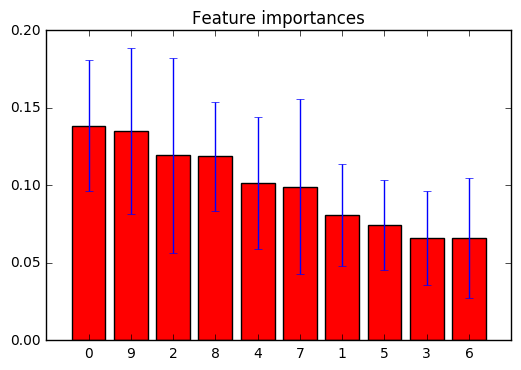

In [17]:
forest = RandomForestClassifier(n_estimators=15, criterion='entropy', max_depth=8)
forest.fit(X,y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()